<a href="https://www.kaggle.com/code/mostafahafez25/internet-data-notebook-eda-and-visulization?scriptVersionId=108505383" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/1-gb-internet-price/worldwide internet users - users.csv
/kaggle/input/1-gb-internet-price/worldwide internet speed in 2022  - avg speed.csv
/kaggle/input/1-gb-internet-price/all_csv sorted.csv
/kaggle/input/1-gb-internet-price/worldwide internet prices in 2022 - IN 2022.csv


# Import Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

%matplotlib inline

# Importing Data and Preprocessing

In [3]:
df= pd.read_csv('/kaggle/input/1-gb-internet-price/all_csv sorted.csv')
df.head()

,S.NO,Country code,Country,Continental region,NO. OF Internet Plans,Average price of 1GB (USD),Cheapest 1GB for 30 days (USD),Most expensive 1GB (USD),Average price of 1GB (USD at the start of 2021),Average price of 1GB (USD – at start of 2020),Internet users,Population,Avg \n(Mbit/s)Ookla
0,0,IL,Israel,NEAR EAST,27.0,0.05,0.02,20.95,0.11,0.9,"6,788,737","8,381,516",28.01
1,1,KG,Kyrgyzstan,CIS (FORMER USSR),20.0,0.15,0.10,7.08,0.21,0.27,"2,309,235","6,304,030",16.30
2,2,FJ,Fiji,OCEANIA,18.0,0.19,0.05,0.85,0.59,3.57,"452,479","883,483",25.99
3,3,IT,Italy,WESTERN EUROPE,29.0,0.27,0.09,3.54,0.43,1.73,"50,540,000","60,627,291",37.15
4,4,SD,Sudan,SUB-SAHARAN AFRICA,33.0,0.27,0.03,0.92,0.63,0.68,"12,512,639","41,801,533",9.50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 13 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   S.NO                                              242 non-null    int64  
 1   Country code                                      242 non-null    object 
 2   Country                                           242 non-null    object 
 3   Continental region                                242 non-null    object 
 4   NO. OF Internet Plans                             231 non-null    float64
 5   Average price of 1GB (USD)                        242 non-null    object 
 6   Cheapest 1GB for 30 days (USD)                    231 non-null    float64
 7   Most expensive 1GB (USD)                          231 non-null    float64
 8   Average price of 1GB (USD  at the start of 2021)  231 non-null    object 
 9   Average price of 1GB 

## Dataframe Columns Structuring

In [5]:
df.columns= df.columns.str.lower().str.replace('.','').str.replace('–','').str.replace('-','').str.replace('  ',' ').str.strip().str.replace(' ','_')
df.columns

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


Index(['sno', 'country_code', 'country', 'continental_region',
       'no_of_internet_plans', 'average_price_of_1gb_(usd)',
       'cheapest_1gb_for_30_days_(usd)', 'most_expensive_1gb_(usd)',
       'average_price_of_1gb_(usd_at_the_start_of_2021)',
       'average_price_of_1gb_(usd_at_start_of_2020)', 'internet_users',
       'population', 'avg_\n(mbit/s)ookla'],
      dtype='object')

In [6]:
df= df.drop('avg_\n(mbit/s)ookla',axis=1)
df.head()

,sno,country_code,country,continental_region,no_of_internet_plans,average_price_of_1gb_(usd),cheapest_1gb_for_30_days_(usd),most_expensive_1gb_(usd),average_price_of_1gb_(usd_at_the_start_of_2021),average_price_of_1gb_(usd_at_start_of_2020),internet_users,population
0,0,IL,Israel,NEAR EAST,27.0,0.05,0.02,20.95,0.11,0.9,"6,788,737","8,381,516"
1,1,KG,Kyrgyzstan,CIS (FORMER USSR),20.0,0.15,0.10,7.08,0.21,0.27,"2,309,235","6,304,030"
2,2,FJ,Fiji,OCEANIA,18.0,0.19,0.05,0.85,0.59,3.57,"452,479","883,483"
3,3,IT,Italy,WESTERN EUROPE,29.0,0.27,0.09,3.54,0.43,1.73,"50,540,000","60,627,291"
4,4,SD,Sudan,SUB-SAHARAN AFRICA,33.0,0.27,0.03,0.92,0.63,0.68,"12,512,639","41,801,533"


## Dataframe Cleaning

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

sno                                                 0
country_code                                        0
country                                             0
continental_region                                  0
no_of_internet_plans                               11
average_price_of_1gb_(usd)                          0
cheapest_1gb_for_30_days_(usd)                     11
most_expensive_1gb_(usd)                           11
average_price_of_1gb_(usd_at_the_start_of_2021)    11
average_price_of_1gb_(usd_at_start_of_2020)        11
internet_users                                     30
population                                         32
dtype: int64

In [9]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 230
Data columns (total 12 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   sno                                              203 non-null    int64  
 1   country_code                                     203 non-null    object 
 2   country                                          203 non-null    object 
 3   continental_region                               203 non-null    object 
 4   no_of_internet_plans                             203 non-null    float64
 5   average_price_of_1gb_(usd)                       203 non-null    object 
 6   cheapest_1gb_for_30_days_(usd)                   203 non-null    float64
 7   most_expensive_1gb_(usd)                         203 non-null    float64
 8   average_price_of_1gb_(usd_at_the_start_of_2021)  203 non-null    object 
 9   average_price_of_1gb_(usd_at_sta

In [10]:
df['population'].value_counts()

6,859,408      2
8,381,516      1
127,202,192    1
604,245        1
37,910         1
              ..
1,322,920      1
9,965,318      1
67,141,684     1
4,818,690      1
1,308,975      1
Name: population, Length: 202, dtype: int64

In [11]:
df[df['population']== '6,859,408']

,sno,country_code,country,continental_region,no_of_internet_plans,average_price_of_1gb_(usd),cheapest_1gb_for_30_days_(usd),most_expensive_1gb_(usd),average_price_of_1gb_(usd_at_the_start_of_2021),average_price_of_1gb_(usd_at_start_of_2020),internet_users,population
182,182,LB,Lebanon,NEAR EAST,15.0,4.81,1.21,77.7,3.82,5.84,"4,755,187","6,859,408"
183,183,LB,Lebanon,NEAR EAST,15.0,4.81,1.21,77.7,3.82,5.84,"4,755,187","6,859,408"


In [12]:
df.drop(index=183, inplace=True)
df[df['population']== '6,859,408']

,sno,country_code,country,continental_region,no_of_internet_plans,average_price_of_1gb_(usd),cheapest_1gb_for_30_days_(usd),most_expensive_1gb_(usd),average_price_of_1gb_(usd_at_the_start_of_2021),average_price_of_1gb_(usd_at_start_of_2020),internet_users,population
182,182,LB,Lebanon,NEAR EAST,15.0,4.81,1.21,77.7,3.82,5.84,"4,755,187","6,859,408"


In [13]:
df['country_code'].value_counts()

AW    2
IL    1
DE    1
BZ    1
LU    1
     ..
EE    1
JO    1
GB    1
IE    1
GQ    1
Name: country_code, Length: 201, dtype: int64

In [14]:
df[df['country_code']== 'AW']

,sno,country_code,country,continental_region,no_of_internet_plans,average_price_of_1gb_(usd),cheapest_1gb_for_30_days_(usd),most_expensive_1gb_(usd),average_price_of_1gb_(usd_at_the_start_of_2021),average_price_of_1gb_(usd_at_start_of_2020),internet_users,population
174,174,AW,Aruba (Netherlands),CARIBBEAN,17.0,4.44,0.74,8.96,9.11,5.56,"15,877,494","17,059,560"
175,175,AW,Aruba (Netherlands),CARIBBEAN,17.0,4.44,0.74,8.96,9.11,5.56,"102,285","105,845"


In [15]:
df.drop(index=174, inplace=True)
df[df['country_code']== 'AW']

,sno,country_code,country,continental_region,no_of_internet_plans,average_price_of_1gb_(usd),cheapest_1gb_for_30_days_(usd),most_expensive_1gb_(usd),average_price_of_1gb_(usd_at_the_start_of_2021),average_price_of_1gb_(usd_at_start_of_2020),internet_users,population
175,175,AW,Aruba (Netherlands),CARIBBEAN,17.0,4.44,0.74,8.96,9.11,5.56,"102,285","105,845"


In [16]:
df[df.eq('NO PACKAGES').any(1)]

,sno,country_code,country,continental_region,no_of_internet_plans,average_price_of_1gb_(usd),cheapest_1gb_for_30_days_(usd),most_expensive_1gb_(usd),average_price_of_1gb_(usd_at_the_start_of_2021),average_price_of_1gb_(usd_at_start_of_2020),internet_users,population
195,195,VU,Vanuatu,OCEANIA,23.0,6.06,0.75,28.23,4.25,NO PACKAGES,"71,050","292,680"
196,196,TV,Tuvalu,OCEANIA,9.0,6.35,5.72,10.17,NO PACKAGES,12.42,"5,520","11,508"
204,205,CU,Cuba,CARIBBEAN,9.0,7.5,3.20,12.50,13.33,NO PACKAGES,"5,638,956","11,338,134"


In [17]:
df= df[df['average_price_of_1gb_(usd_at_the_start_of_2021)'] != 'NO PACKAGES']
df= df[df['average_price_of_1gb_(usd_at_start_of_2020)'] != 'NO PACKAGES']

In [18]:
df[df.eq('NO PACKAGES').any(1)]

,sno,country_code,country,continental_region,no_of_internet_plans,average_price_of_1gb_(usd),cheapest_1gb_for_30_days_(usd),most_expensive_1gb_(usd),average_price_of_1gb_(usd_at_the_start_of_2021),average_price_of_1gb_(usd_at_start_of_2020),internet_users,population


In [19]:
df['internet_users']= df['internet_users'].str.replace(',','')
df['population']= df['population'].str.replace(',','')
df.head()

,sno,country_code,country,continental_region,no_of_internet_plans,average_price_of_1gb_(usd),cheapest_1gb_for_30_days_(usd),most_expensive_1gb_(usd),average_price_of_1gb_(usd_at_the_start_of_2021),average_price_of_1gb_(usd_at_start_of_2020),internet_users,population
0,0,IL,Israel,NEAR EAST,27.0,0.05,0.02,20.95,0.11,0.9,6788737,8381516
1,1,KG,Kyrgyzstan,CIS (FORMER USSR),20.0,0.15,0.10,7.08,0.21,0.27,2309235,6304030
2,2,FJ,Fiji,OCEANIA,18.0,0.19,0.05,0.85,0.59,3.57,452479,883483
3,3,IT,Italy,WESTERN EUROPE,29.0,0.27,0.09,3.54,0.43,1.73,50540000,60627291
4,4,SD,Sudan,SUB-SAHARAN AFRICA,33.0,0.27,0.03,0.92,0.63,0.68,12512639,41801533


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 230
Data columns (total 12 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   sno                                              198 non-null    int64  
 1   country_code                                     198 non-null    object 
 2   country                                          198 non-null    object 
 3   continental_region                               198 non-null    object 
 4   no_of_internet_plans                             198 non-null    float64
 5   average_price_of_1gb_(usd)                       198 non-null    object 
 6   cheapest_1gb_for_30_days_(usd)                   198 non-null    float64
 7   most_expensive_1gb_(usd)                         198 non-null    float64
 8   average_price_of_1gb_(usd_at_the_start_of_2021)  198 non-null    object 
 9   average_price_of_1gb_(usd_at_sta

## Validating Data Structure

In [21]:
df= df.astype({'no_of_internet_plans': int,'average_price_of_1gb_(usd)': float, 'average_price_of_1gb_(usd_at_the_start_of_2021)': float,
           'average_price_of_1gb_(usd_at_start_of_2020)':float, 'internet_users': int, 'population':int })
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 230
Data columns (total 12 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   sno                                              198 non-null    int64  
 1   country_code                                     198 non-null    object 
 2   country                                          198 non-null    object 
 3   continental_region                               198 non-null    object 
 4   no_of_internet_plans                             198 non-null    int64  
 5   average_price_of_1gb_(usd)                       198 non-null    float64
 6   cheapest_1gb_for_30_days_(usd)                   198 non-null    float64
 7   most_expensive_1gb_(usd)                         198 non-null    float64
 8   average_price_of_1gb_(usd_at_the_start_of_2021)  198 non-null    float64
 9   average_price_of_1gb_(usd_at_sta

In [22]:
df.shape

(198, 12)

In [23]:
df.set_index('sno', inplace=True)
df.head()

,country_code,country,continental_region,no_of_internet_plans,average_price_of_1gb_(usd),cheapest_1gb_for_30_days_(usd),most_expensive_1gb_(usd),average_price_of_1gb_(usd_at_the_start_of_2021),average_price_of_1gb_(usd_at_start_of_2020),internet_users,population
sno,,,,,,,,,,,
0,IL,Israel,NEAR EAST,27,0.05,0.02,20.95,0.11,0.90,6788737,8381516
1,KG,Kyrgyzstan,CIS (FORMER USSR),20,0.15,0.10,7.08,0.21,0.27,2309235,6304030
2,FJ,Fiji,OCEANIA,18,0.19,0.05,0.85,0.59,3.57,452479,883483
3,IT,Italy,WESTERN EUROPE,29,0.27,0.09,3.54,0.43,1.73,50540000,60627291
4,SD,Sudan,SUB-SAHARAN AFRICA,33,0.27,0.03,0.92,0.63,0.68,12512639,41801533


In [24]:
df.reset_index(drop=True, inplace=True)

In [25]:
df.head()

,country_code,country,continental_region,no_of_internet_plans,average_price_of_1gb_(usd),cheapest_1gb_for_30_days_(usd),most_expensive_1gb_(usd),average_price_of_1gb_(usd_at_the_start_of_2021),average_price_of_1gb_(usd_at_start_of_2020),internet_users,population
0,IL,Israel,NEAR EAST,27,0.05,0.02,20.95,0.11,0.90,6788737,8381516
1,KG,Kyrgyzstan,CIS (FORMER USSR),20,0.15,0.10,7.08,0.21,0.27,2309235,6304030
2,FJ,Fiji,OCEANIA,18,0.19,0.05,0.85,0.59,3.57,452479,883483
3,IT,Italy,WESTERN EUROPE,29,0.27,0.09,3.54,0.43,1.73,50540000,60627291
4,SD,Sudan,SUB-SAHARAN AFRICA,33,0.27,0.03,0.92,0.63,0.68,12512639,41801533


# Data Analysis

## Needed Statistical Values

In [26]:
df['internet_users_ratio']= round(df['internet_users']/df['population'], 2)
df.head()

,country_code,country,continental_region,no_of_internet_plans,average_price_of_1gb_(usd),cheapest_1gb_for_30_days_(usd),most_expensive_1gb_(usd),average_price_of_1gb_(usd_at_the_start_of_2021),average_price_of_1gb_(usd_at_start_of_2020),internet_users,population,internet_users_ratio
0,IL,Israel,NEAR EAST,27,0.05,0.02,20.95,0.11,0.90,6788737,8381516,0.81
1,KG,Kyrgyzstan,CIS (FORMER USSR),20,0.15,0.10,7.08,0.21,0.27,2309235,6304030,0.37
2,FJ,Fiji,OCEANIA,18,0.19,0.05,0.85,0.59,3.57,452479,883483,0.51
3,IT,Italy,WESTERN EUROPE,29,0.27,0.09,3.54,0.43,1.73,50540000,60627291,0.83
4,SD,Sudan,SUB-SAHARAN AFRICA,33,0.27,0.03,0.92,0.63,0.68,12512639,41801533,0.30


In [27]:
df['internet_users_ctg']= pd.qcut(df['internet_users_ratio'], q=[0,0.35,0.7,1], labels=['Low Ratio','Intermediate Ratio','High Ratio'])
df.head()

,country_code,country,continental_region,no_of_internet_plans,average_price_of_1gb_(usd),cheapest_1gb_for_30_days_(usd),most_expensive_1gb_(usd),average_price_of_1gb_(usd_at_the_start_of_2021),average_price_of_1gb_(usd_at_start_of_2020),internet_users,population,internet_users_ratio,internet_users_ctg
0,IL,Israel,NEAR EAST,27,0.05,0.02,20.95,0.11,0.90,6788737,8381516,0.81,High Ratio
1,KG,Kyrgyzstan,CIS (FORMER USSR),20,0.15,0.10,7.08,0.21,0.27,2309235,6304030,0.37,Low Ratio
2,FJ,Fiji,OCEANIA,18,0.19,0.05,0.85,0.59,3.57,452479,883483,0.51,Low Ratio
3,IT,Italy,WESTERN EUROPE,29,0.27,0.09,3.54,0.43,1.73,50540000,60627291,0.83,High Ratio
4,SD,Sudan,SUB-SAHARAN AFRICA,33,0.27,0.03,0.92,0.63,0.68,12512639,41801533,0.30,Low Ratio


## Data Statistics

In [28]:
df.describe(include='all')

,country_code,country,continental_region,no_of_internet_plans,average_price_of_1gb_(usd),cheapest_1gb_for_30_days_(usd),most_expensive_1gb_(usd),average_price_of_1gb_(usd_at_the_start_of_2021),average_price_of_1gb_(usd_at_start_of_2020),internet_users,population,internet_users_ratio,internet_users_ctg
count,198,198,198,198.000000,198.000000,198.000000,198.00000,198.000000,198.000000,1.980000e+02,1.980000e+02,198.000000,198
unique,198,198,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,IL,Israel,SUB-SAHARAN AFRICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low Ratio
freq,1,1,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
mean,NaN,NaN,NaN,28.535354,3.897323,1.627121,29.55197,5.027525,7.953889,2.478574e+07,3.753892e+07,0.589646,NaN
std,NaN,NaN,NaN,16.730660,6.598898,4.981805,62.48289,6.887128,9.086384,9.838574e+07,1.444940e+08,0.282375,NaN
min,NaN,NaN,NaN,1.000000,0.050000,0.000000,0.63000,0.090000,0.260000,1.034000e+03,1.620000e+03,0.020000,NaN
25%,NaN,NaN,NaN,17.000000,1.025000,0.182500,5.50750,1.345000,2.785000,3.930820e+05,1.149527e+06,0.332500,NaN
50%,NaN,NaN,NaN,24.000000,2.120000,0.535000,11.93500,3.160000,4.950000,2.661349e+06,7.003837e+06,0.650000,NaN
75%,NaN,NaN,NaN,41.500000,3.957500,1.257500,34.78750,5.287500,10.217500,1.012742e+07,2.517951e+07,0.810000,NaN


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


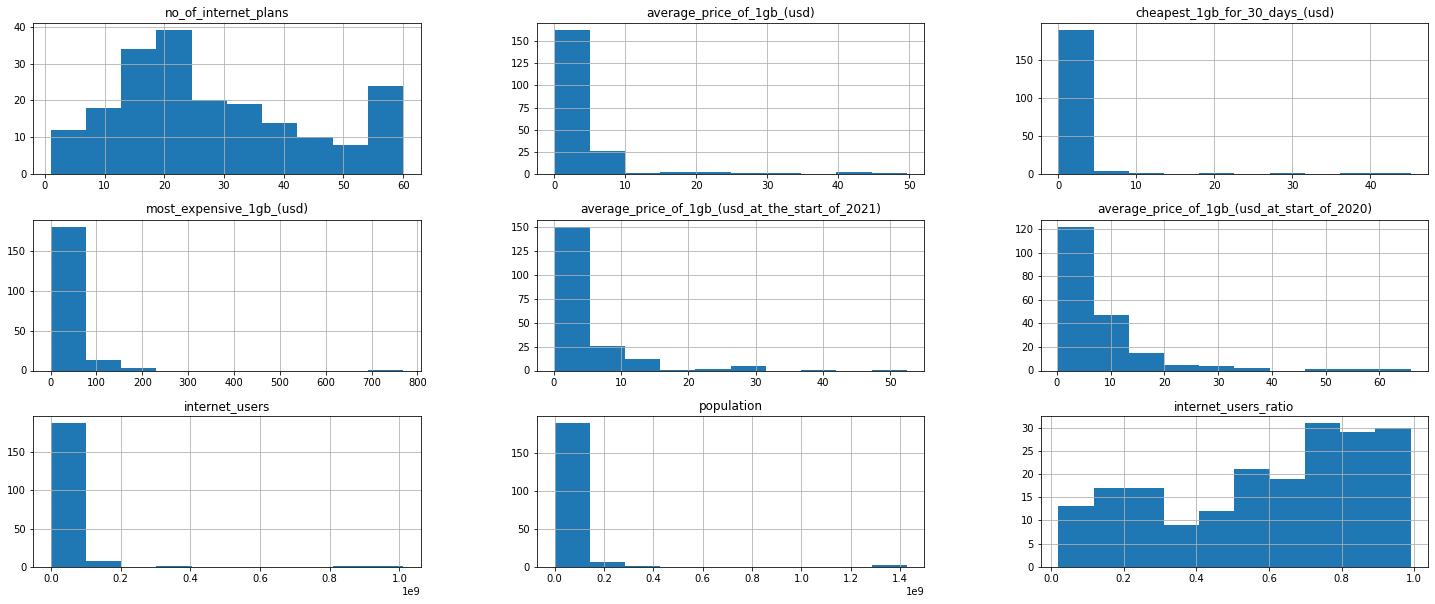

In [29]:
fig=plt.figure(figsize=(25,10))
ax=fig.gca()
df.hist(ax=ax)
plt.show();

## Deleting Main Outliers

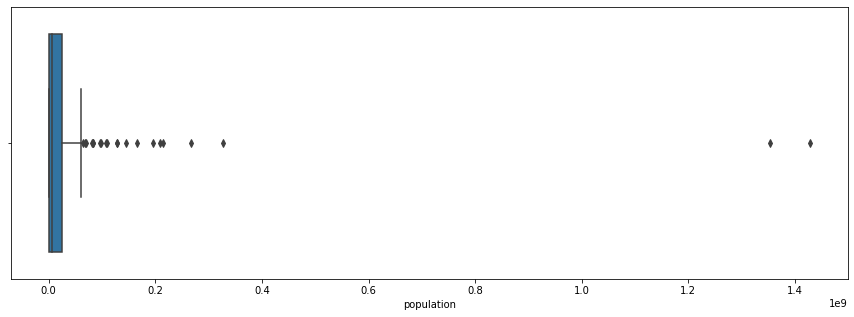

In [30]:
plt.figure(figsize=(15,5))
sb.boxplot(x='population',data=df)

plt.show()

In [31]:
pop_q1 = np.percentile(df.population, 25)
pop_q2 = np.percentile(df.population, 50)
pop_q3 = np.percentile(df.population, 75)
pop_iqr = pop_q3 - pop_q1
pop_min = pop_q1 - 1.5*pop_iqr
pop_max = pop_q3 + 1.5*pop_iqr
print('Min: {} \nQ1: {} \nMedian: {} \nQ3: {} \nMax: {} \nIQR: {}'.format(pop_min, pop_q1, pop_q2, pop_q3, pop_max, pop_iqr ))

Min: -34895444.125 
Q1: 1149527.0 
Median: 7003837.0 
Q3: 25179507.75 
Max: 61224478.875 
IQR: 24029980.75


In [32]:
df1=df[(df.population > pop_min) & (df.population < pop_max)]
df1.shape

(177, 13)

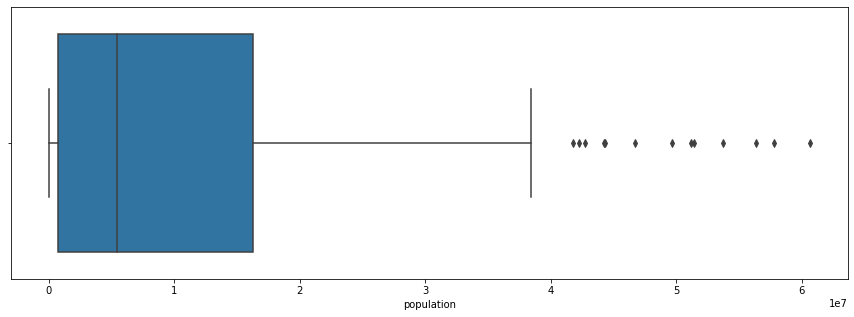

In [33]:
plt.figure(figsize=(15,5))
sb.boxplot(x='population',data=df1)

plt.show()

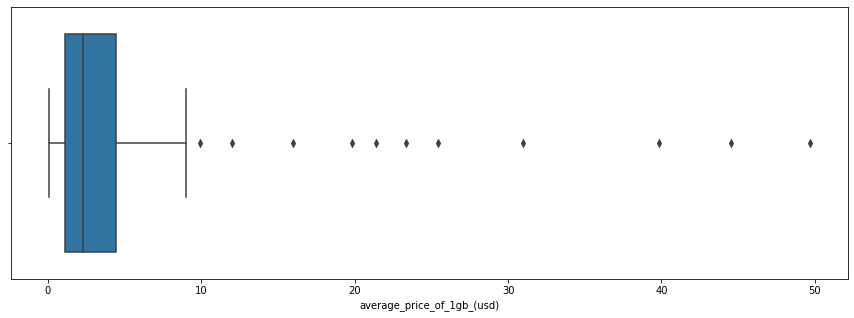

In [34]:
plt.figure(figsize=(15,5))
sb.boxplot(x='average_price_of_1gb_(usd)',data=df1)

plt.show()

In [35]:
avgusr_q1 = np.percentile(df1['average_price_of_1gb_(usd)'], 25)
avgusr_q2 = np.percentile(df1['average_price_of_1gb_(usd)'], 50)
avgusr_q3 = np.percentile(df1['average_price_of_1gb_(usd)'], 75)
avgusr_iqr = avgusr_q3 - avgusr_q1
avgusr_min = avgusr_q1 - 1.5*avgusr_iqr
avgusr_max = avgusr_q3 + 1.5*avgusr_iqr
print('Min: {} \nQ1: {} \nMedian: {} \nQ3: {} \nMax: {} \nIQR: {}'.format(avgusr_min, avgusr_q1, avgusr_q2, avgusr_q3, avgusr_max, avgusr_iqr ))

Min: -3.835000000000001 
Q1: 1.13 
Median: 2.26 
Q3: 4.44 
Max: 9.405000000000001 
IQR: 3.3100000000000005


In [36]:
df2=df1[(df1['average_price_of_1gb_(usd)'] > avgusr_min) & (df1['average_price_of_1gb_(usd)'] < avgusr_max)]
df2.shape

(166, 13)

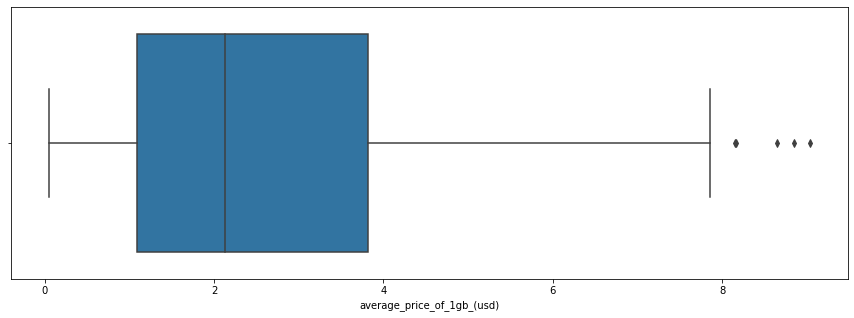

In [37]:
plt.figure(figsize=(15,5))
sb.boxplot(x='average_price_of_1gb_(usd)',data=df2)

plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


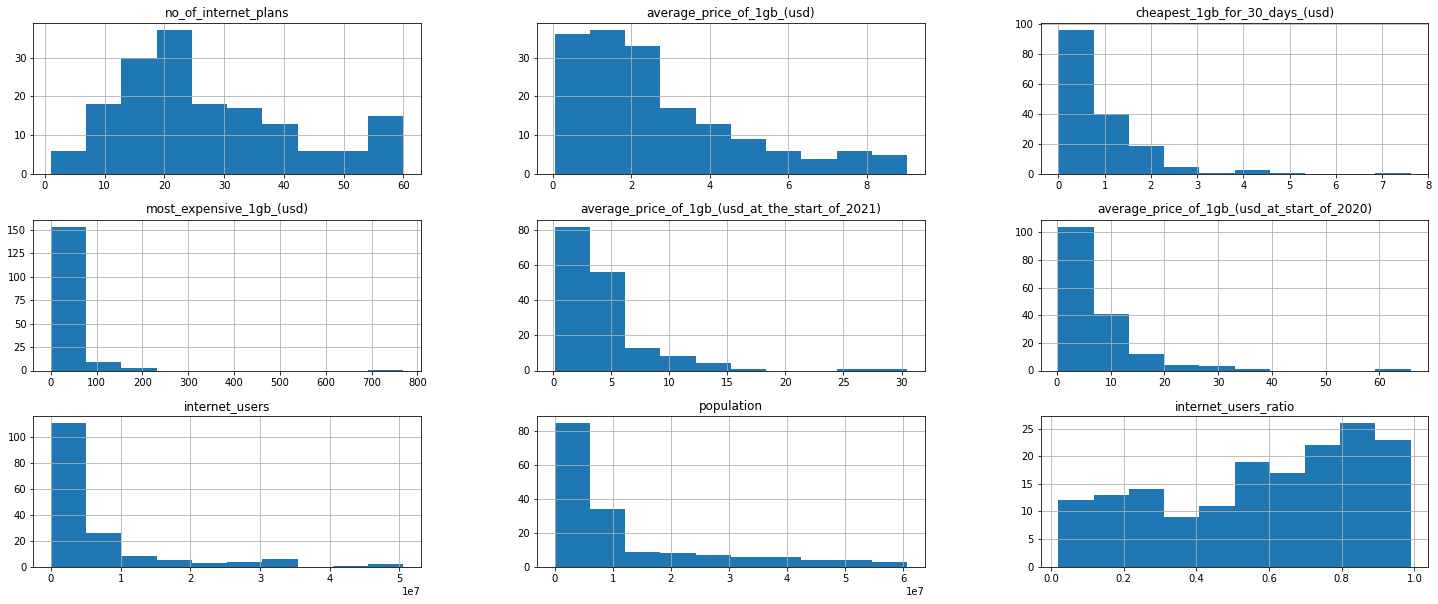

In [38]:
fig=plt.figure(figsize=(25,10))
ax=fig.gca()
df2.hist(ax=ax)
plt.show();

In [39]:
df_outlier=df[~df.country.isin(df2.country)]
df_outlier.head()

,country_code,country,continental_region,no_of_internet_plans,average_price_of_1gb_(usd),cheapest_1gb_for_30_days_(usd),most_expensive_1gb_(usd),average_price_of_1gb_(usd_at_the_start_of_2021),average_price_of_1gb_(usd_at_start_of_2020),internet_users,population,internet_users_ratio,internet_users_ctg
5,RU,Russia,CIS (FORMER USSR),22,0.29,0.13,1.86,0.52,0.91,124000000,145734038,0.85,High Ratio
7,BD,Bangladesh,ASIA (EX. NEAR EAST),60,0.34,0.11,2.22,0.70,0.99,129180000,166303498,0.78,Intermediate Ratio
10,FR,France,WESTERN EUROPE,45,0.41,0.09,118.20,0.81,1.21,59470000,64990511,0.92,High Ratio
11,ID,Indonesia,ASIA (EX. NEAR EAST),53,0.42,0.17,2.94,0.64,2.99,196000000,267670543,0.73,Intermediate Ratio
14,VN,Vietnam,ASIA (EX. NEAR EAST),46,0.49,0.07,5.55,0.57,1.31,68172134,95545962,0.71,Intermediate Ratio


In [40]:
df_outlier.describe(include='all')

,country_code,country,continental_region,no_of_internet_plans,average_price_of_1gb_(usd),cheapest_1gb_for_30_days_(usd),most_expensive_1gb_(usd),average_price_of_1gb_(usd_at_the_start_of_2021),average_price_of_1gb_(usd_at_start_of_2020),internet_users,population,internet_users_ratio,internet_users_ctg
count,32,32,32,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,3.200000e+01,3.200000e+01,32.000000,32
unique,32,32,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,RU,Russia,ASIA (EX. NEAR EAST),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intermediate Ratio
freq,1,1,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
mean,NaN,NaN,NaN,35.093750,10.042500,5.495625,30.607187,9.725625,10.753750,1.207190e+08,1.715870e+08,0.634375,NaN
std,NaN,NaN,NaN,21.333541,14.343808,11.560235,35.195165,13.455397,13.758331,2.228854e+08,3.307581e+08,0.288600,NaN
min,NaN,NaN,NaN,3.000000,0.290000,0.020000,1.210000,0.090000,0.260000,2.881000e+03,3.234000e+03,0.060000,NaN
25%,NaN,NaN,NaN,16.750000,0.667500,0.110000,3.862500,0.742500,2.015000,1.159818e+06,1.307102e+07,0.432500,NaN
50%,NaN,NaN,NaN,38.000000,1.740000,0.375000,11.945000,1.930000,5.685000,6.658658e+07,8.273225e+07,0.710000,NaN
75%,NaN,NaN,NaN,58.000000,16.935000,2.805000,45.252500,13.580000,12.050000,1.201000e+08,1.508764e+08,0.860000,NaN


## Data Visualization

### Univariante

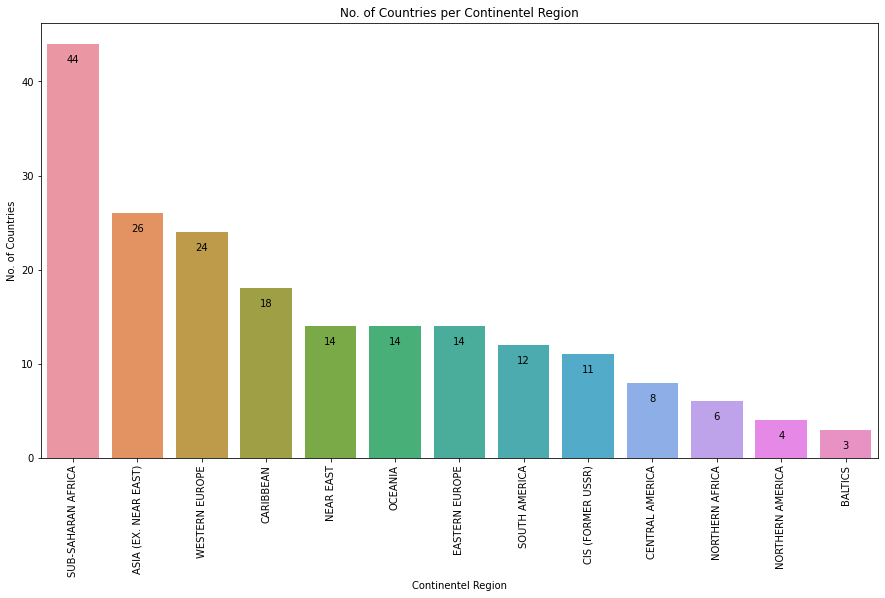

In [41]:
plt.figure(figsize=(15,8))
sb.countplot(x= df.continental_region, order= df.continental_region.value_counts().index)

for i in range(len(df.continental_region.value_counts())):
    plt.text(i,df.continental_region.value_counts()[i]-2, df.continental_region.value_counts()[i], ha='center')

plt.title('No. of Countries per Continentel Region')
plt.xlabel('Continentel Region')
plt.ylabel('No. of Countries')
plt.xticks(rotation=90)
plt.show()

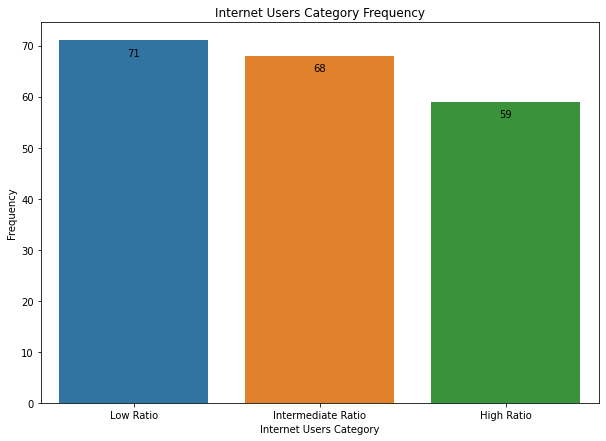

In [42]:
plt.figure(figsize=(10,7))
sb.countplot(x= df.internet_users_ctg, order= df.internet_users_ctg.value_counts().index)

for i in range(len(df.internet_users_ctg.value_counts())):
    plt.text(i,df.internet_users_ctg.value_counts()[i]-3, df.internet_users_ctg.value_counts()[i], ha='center')


plt.title('Internet Users Category Frequency')
plt.xlabel('Internet Users Category')
plt.ylabel('Frequency')
plt.show()

In [43]:
df_avg_contreg= df2.groupby(['continental_region']).mean()
df_avg_contreg.reset_index(inplace=True)
df_avg_contreg.head()

,continental_region,no_of_internet_plans,average_price_of_1gb_(usd),cheapest_1gb_for_30_days_(usd),most_expensive_1gb_(usd),average_price_of_1gb_(usd_at_the_start_of_2021),average_price_of_1gb_(usd_at_start_of_2020),internet_users,population,internet_users_ratio
0,ASIA (EX. NEAR EAST),34.437500,1.878125,0.434375,18.388125,2.678125,4.568750,1.007459e+07,1.807554e+07,0.552500
1,BALTICS,26.333333,2.086667,0.243333,35.850000,2.303333,7.950000,1.660902e+06,2.017548e+06,0.830000
2,CARIBBEAN,15.882353,3.261176,1.398824,24.922941,5.938235,7.953529,8.611570e+05,1.802414e+06,0.687647
3,CENTRAL AMERICA,21.571429,2.227143,1.082857,11.814286,3.018571,13.411429,3.501842e+06,7.040143e+06,0.471429
4,CIS (FORMER USSR),26.333333,1.055556,0.238889,14.400000,1.316667,3.442222,9.586243e+06,1.520041e+07,0.626667


### Bivariante

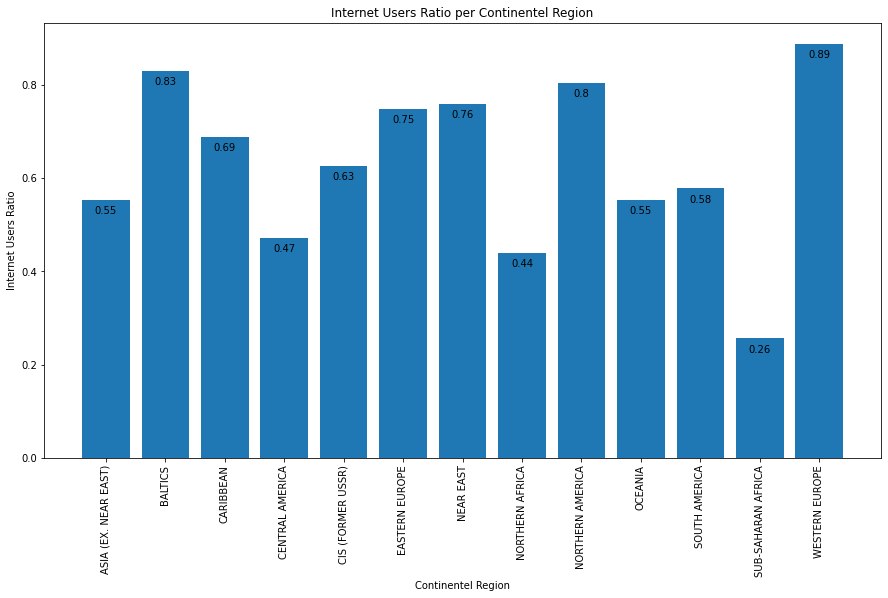

In [44]:
plt.figure(figsize=(15,8))
plt.bar(x= 'continental_region', height= 'internet_users_ratio', data=df_avg_contreg)

for i in range(len(df_avg_contreg.continental_region)):
    plt.text(i, df_avg_contreg.internet_users_ratio[i]-0.03, round(df_avg_contreg.internet_users_ratio[i],2), ha='center')

plt.title('Internet Users Ratio per Continentel Region')
plt.xlabel('Continentel Region')
plt.ylabel('Internet Users Ratio')
plt.xticks(rotation=90)
plt.show()

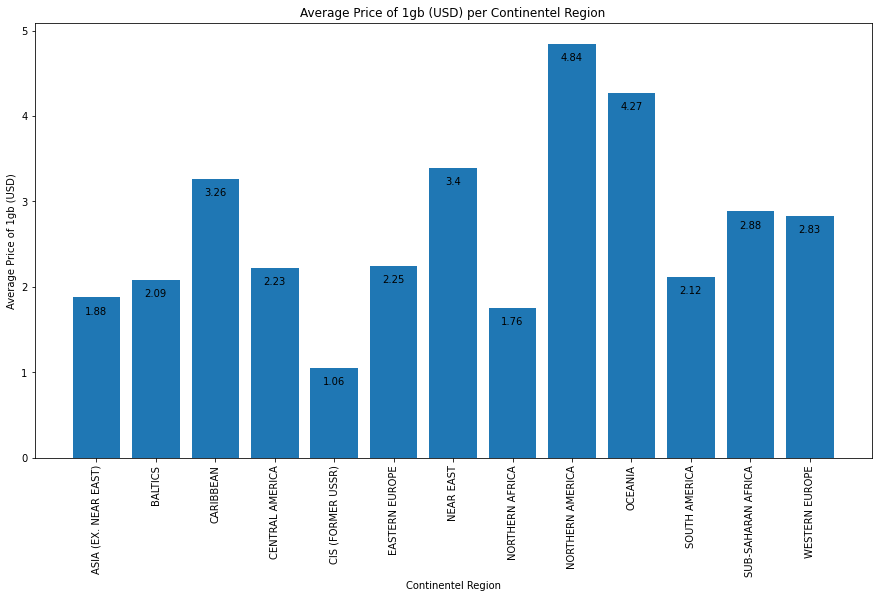

In [45]:
plt.figure(figsize=(15,8))
plt.bar(x= 'continental_region', height= 'average_price_of_1gb_(usd)', data=df_avg_contreg)

for i in range(len(df_avg_contreg.continental_region)):
    plt.text(i, df_avg_contreg['average_price_of_1gb_(usd)'][i]-0.2, round(df_avg_contreg['average_price_of_1gb_(usd)'][i],2), ha='center')

plt.title('Average Price of 1gb (USD) per Continentel Region')
plt.xlabel('Continentel Region')
plt.ylabel('Average Price of 1gb (USD)')
plt.xticks(rotation=90)
plt.show()

In [46]:
df_avg_intusr= df2.groupby(['internet_users_ctg']).mean()
df_avg_intusr.reset_index(inplace=True)
df_avg_intusr.head()

,internet_users_ctg,no_of_internet_plans,average_price_of_1gb_(usd),cheapest_1gb_for_30_days_(usd),most_expensive_1gb_(usd),average_price_of_1gb_(usd_at_the_start_of_2021),average_price_of_1gb_(usd_at_start_of_2020),internet_users,population,internet_users_ratio
0,Low Ratio,28.580645,2.547419,0.894355,20.030968,4.123226,7.905161,3.592288e+06,1.369080e+07,0.264839
1,Intermediate Ratio,24.690909,2.487091,0.865636,35.484364,3.966000,7.084909,7.303251e+06,1.123142e+07,0.664909
2,High Ratio,28.510204,3.175102,0.882653,34.251020,4.295102,7.162449,8.574854e+06,9.701371e+06,0.886939


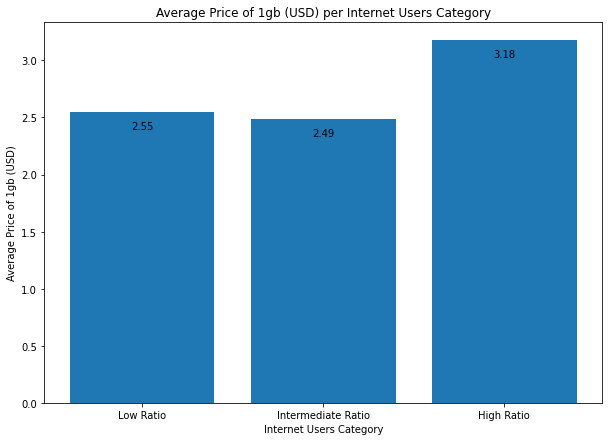

In [47]:
plt.figure(figsize=(10,7))
plt.bar(x= 'internet_users_ctg', height= 'average_price_of_1gb_(usd)', data=df_avg_intusr)

for i in range(len(df_avg_intusr.internet_users_ctg)):
    plt.text(i, df_avg_intusr['average_price_of_1gb_(usd)'][i]-0.15, round(df_avg_intusr['average_price_of_1gb_(usd)'][i], 2), ha='center')

plt.title('Average Price of 1gb (USD) per Internet Users Category')
plt.xlabel('Internet Users Category')
plt.ylabel('Average Price of 1gb (USD)')
plt.show()

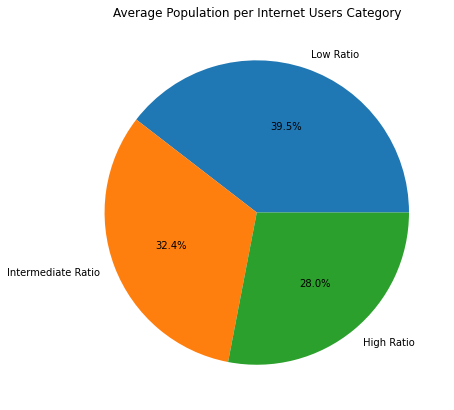

In [48]:
plt.figure(figsize=(10,7))

plt.pie(df_avg_intusr.population, labels=df_avg_intusr.internet_users_ctg, autopct='%1.1f%%')
plt.title('Average Population per Internet Users Category')


plt.show();

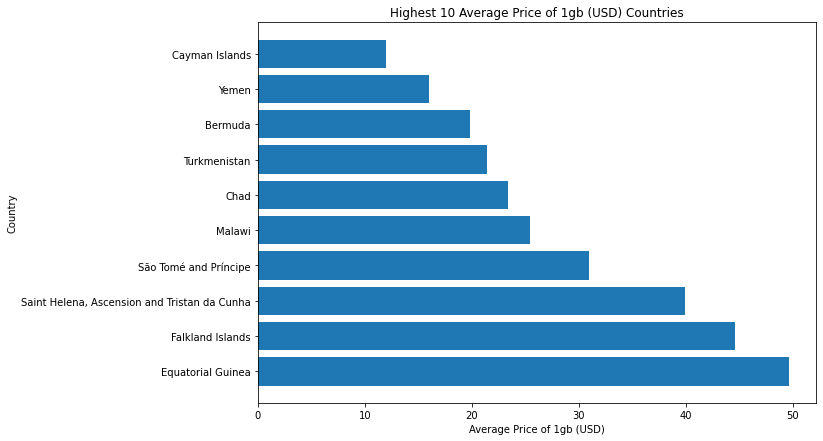

In [49]:
plt.figure(figsize=(10,7))
df_srt= df.sort_values('average_price_of_1gb_(usd)', ascending=False).round(2)
plt.barh(y=df_srt['country'].head(10), width= df_srt['average_price_of_1gb_(usd)'].head(10))

plt.title('Highest 10 Average Price of 1gb (USD) Countries')
plt.xlabel('Average Price of 1gb (USD)')
plt.ylabel('Country')
plt.show()

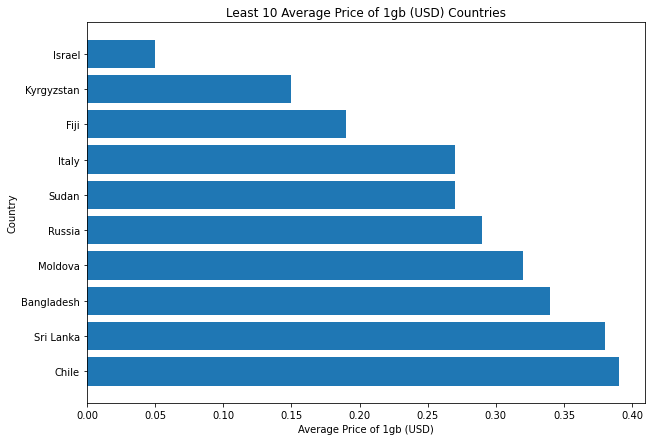

In [50]:
plt.figure(figsize=(10,7))
plt.barh(y=df_srt['country'].tail(10), width= df_srt['average_price_of_1gb_(usd)'].tail(10))

plt.title('Least 10 Average Price of 1gb (USD) Countries')
plt.xlabel('Average Price of 1gb (USD)')
plt.ylabel('Country')
plt.show()

### Multivariante

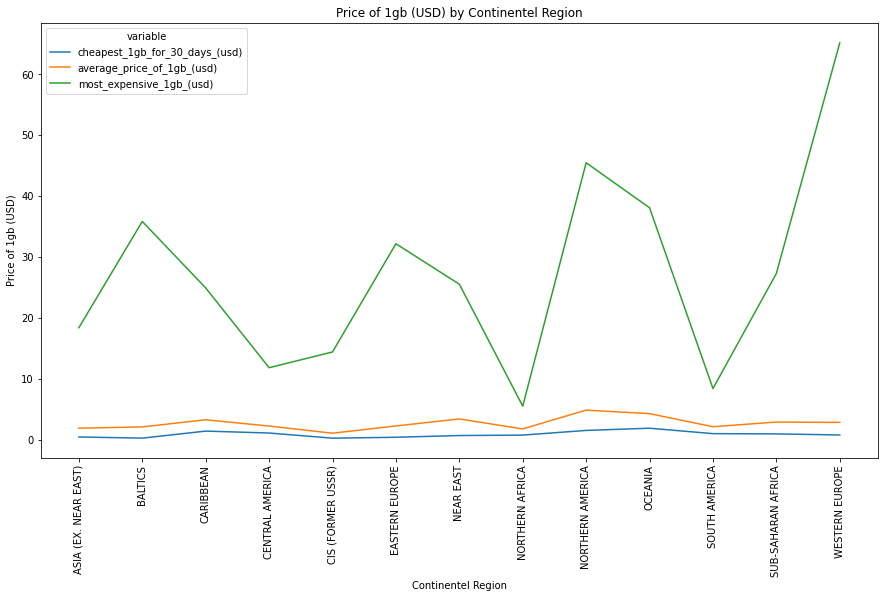

In [51]:
min_avg_max=['cheapest_1gb_for_30_days_(usd)','average_price_of_1gb_(usd)','most_expensive_1gb_(usd)']

plt.figure(figsize=(15,8))
sb.lineplot(data= df_avg_contreg.melt('continental_region', value_vars= min_avg_max), x='continental_region', y='value', hue='variable', ci=None)

plt.title('Price of 1gb (USD) by Continentel Region')
plt.xlabel('Continentel Region')
plt.ylabel('Price of 1gb (USD)')
plt.xticks(rotation=90)
plt.show()

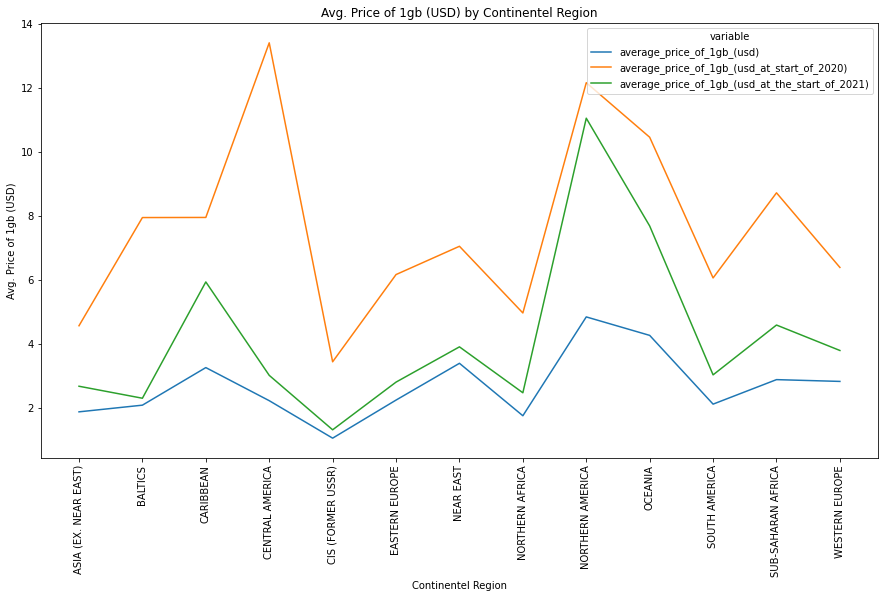

In [52]:
avg_years=['average_price_of_1gb_(usd)','average_price_of_1gb_(usd_at_start_of_2020)','average_price_of_1gb_(usd_at_the_start_of_2021)']

plt.figure(figsize=(15,8))
sb.lineplot(data= df_avg_contreg.melt('continental_region', value_vars= avg_years), x='continental_region', y='value', hue='variable', ci=None)

plt.title('Avg. Price of 1gb (USD) by Continentel Region')
plt.xlabel('Continentel Region')
plt.ylabel('Avg. Price of 1gb (USD)')
plt.xticks(rotation=90)
plt.show()

### Data Correlation

In [53]:
df2.corr()

,no_of_internet_plans,average_price_of_1gb_(usd),cheapest_1gb_for_30_days_(usd),most_expensive_1gb_(usd),average_price_of_1gb_(usd_at_the_start_of_2021),average_price_of_1gb_(usd_at_start_of_2020),internet_users,population,internet_users_ratio
no_of_internet_plans,1.000000,-0.224097,-0.374532,-0.030104,-0.213025,-0.132239,0.438182,0.497948,-0.019214
average_price_of_1gb_(usd),-0.224097,1.000000,0.658125,0.349389,0.625961,0.329949,-0.192955,-0.267994,0.051005
cheapest_1gb_for_30_days_(usd),-0.374532,0.658125,1.000000,0.070296,0.547386,0.263906,-0.300706,-0.333394,-0.057758
most_expensive_1gb_(usd),-0.030104,0.349389,0.070296,1.000000,0.230835,0.031593,0.009287,-0.042696,0.102624
average_price_of_1gb_(usd_at_the_start_of_2021),-0.213025,0.625961,0.547386,0.230835,1.000000,0.413560,-0.166637,-0.219985,-0.004098
average_price_of_1gb_(usd_at_start_of_2020),-0.132239,0.329949,0.263906,0.031593,0.413560,1.000000,-0.171097,-0.175668,-0.083386
internet_users,0.438182,-0.192955,-0.300706,0.009287,-0.166637,-0.171097,1.000000,0.855312,0.234955
population,0.497948,-0.267994,-0.333394,-0.042696,-0.219985,-0.175668,0.855312,1.000000,-0.123646
internet_users_ratio,-0.019214,0.051005,-0.057758,0.102624,-0.004098,-0.083386,0.234955,-0.123646,1.000000


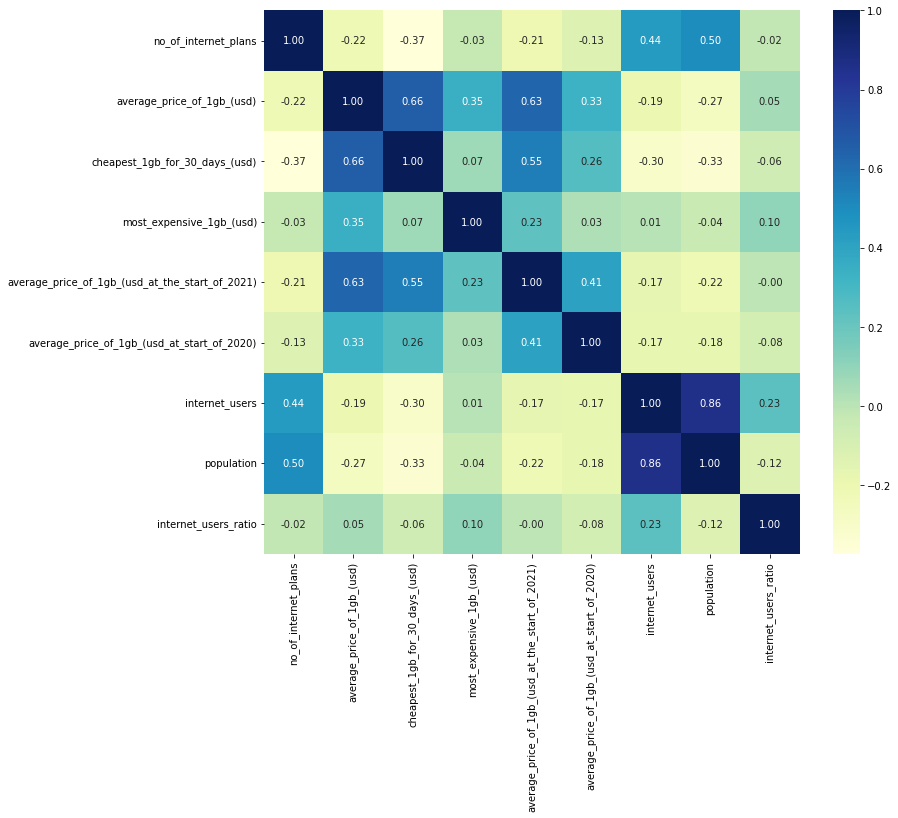

In [54]:
plt.figure(figsize=(12,10))
dataplot = sb.heatmap(df2.corr(), cmap="YlGnBu", annot=True, fmt='.2f')
  
plt.show()

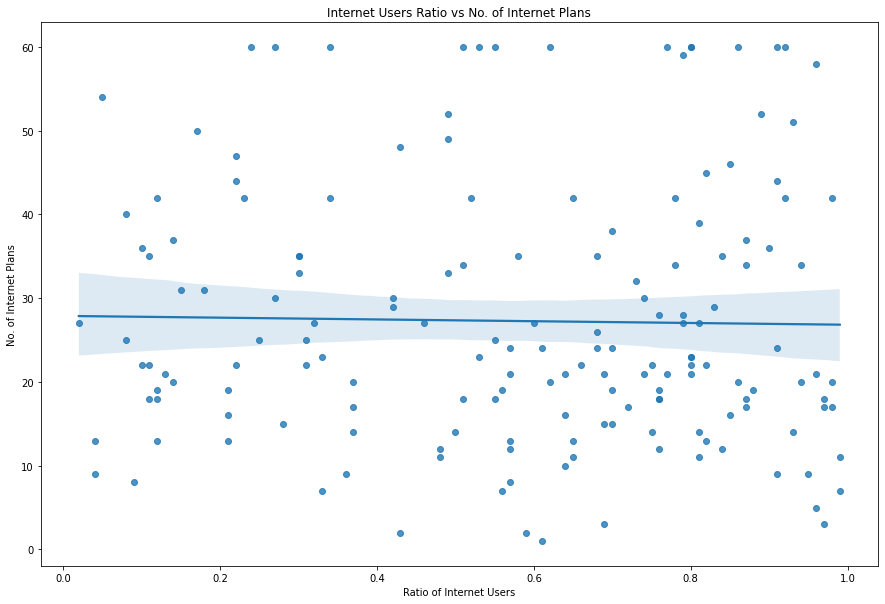

In [55]:
plt.figure(figsize=(15,10))
sb.regplot(data=df2, x='internet_users_ratio', y='no_of_internet_plans')

plt.title('Internet Users Ratio vs No. of Internet Plans')
plt.xlabel('Ratio of Internet Users')
plt.ylabel('No. of Internet Plans')
plt.show()

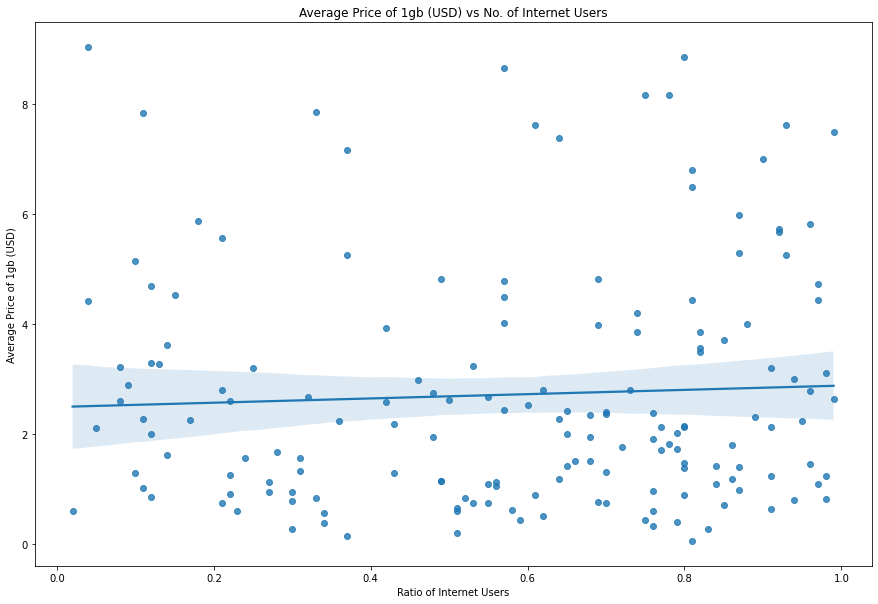

In [56]:
plt.figure(figsize=(15,10))
sb.regplot(data=df2, x='internet_users_ratio', y='average_price_of_1gb_(usd)')

plt.title('Average Price of 1gb (USD) vs No. of Internet Users')
plt.xlabel('Ratio of Internet Users')
plt.ylabel('Average Price of 1gb (USD)')
plt.show()

### Geographical Maps

In [57]:
fig = px.choropleth(df, locations='country', locationmode='country names',color='internet_users_ratio', color_continuous_scale= 'Viridis_r')
fig.show()

In [58]:
fig = px.choropleth(df, locations='country', locationmode='country names',color='average_price_of_1gb_(usd)', color_continuous_scale= 'Viridis_r')
fig.show()

In [59]:
fig = px.choropleth(df, locations='country', locationmode='country names',color='no_of_internet_plans', color_continuous_scale= 'Viridis_r')
fig.show()